In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import base64

import warnings
warnings.filterwarnings("ignore")
import missingno as msno

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale


In [2]:
def regression_(x,y):
    
    lr=LinearRegression()
    r=Ridge()
    l=Lasso()
    e=ElasticNet()
    kn=KNeighborsRegressor()
    et=ExtraTreeRegressor()
    gb=GradientBoostingRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
       
    algos=[lr,r,l,e,kn,et,gb,dt,xgb]
    algos_names=['LinearRegressor','Ridge','Lasso','ElasticNet','KNeighbors','ExtraTree','GradientBoosting','DecisionTree','XGB']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    r_score=[]
    mse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_square','MSE','MAE'],index=algos_names)
    
    for algo in algos:
        pred=algo.fit(x,y).predict(x)
        r_score.append(r2_score(y,pred))
        mse.append(mean_squared_error(y,pred)**.5)
        mae.append(mean_absolute_error(y,pred))
    
    
    result.R_square=r_score
    result.MSE=mse
    result.MAE=mae
    
    return result.sort_values('R_square',ascending=False)

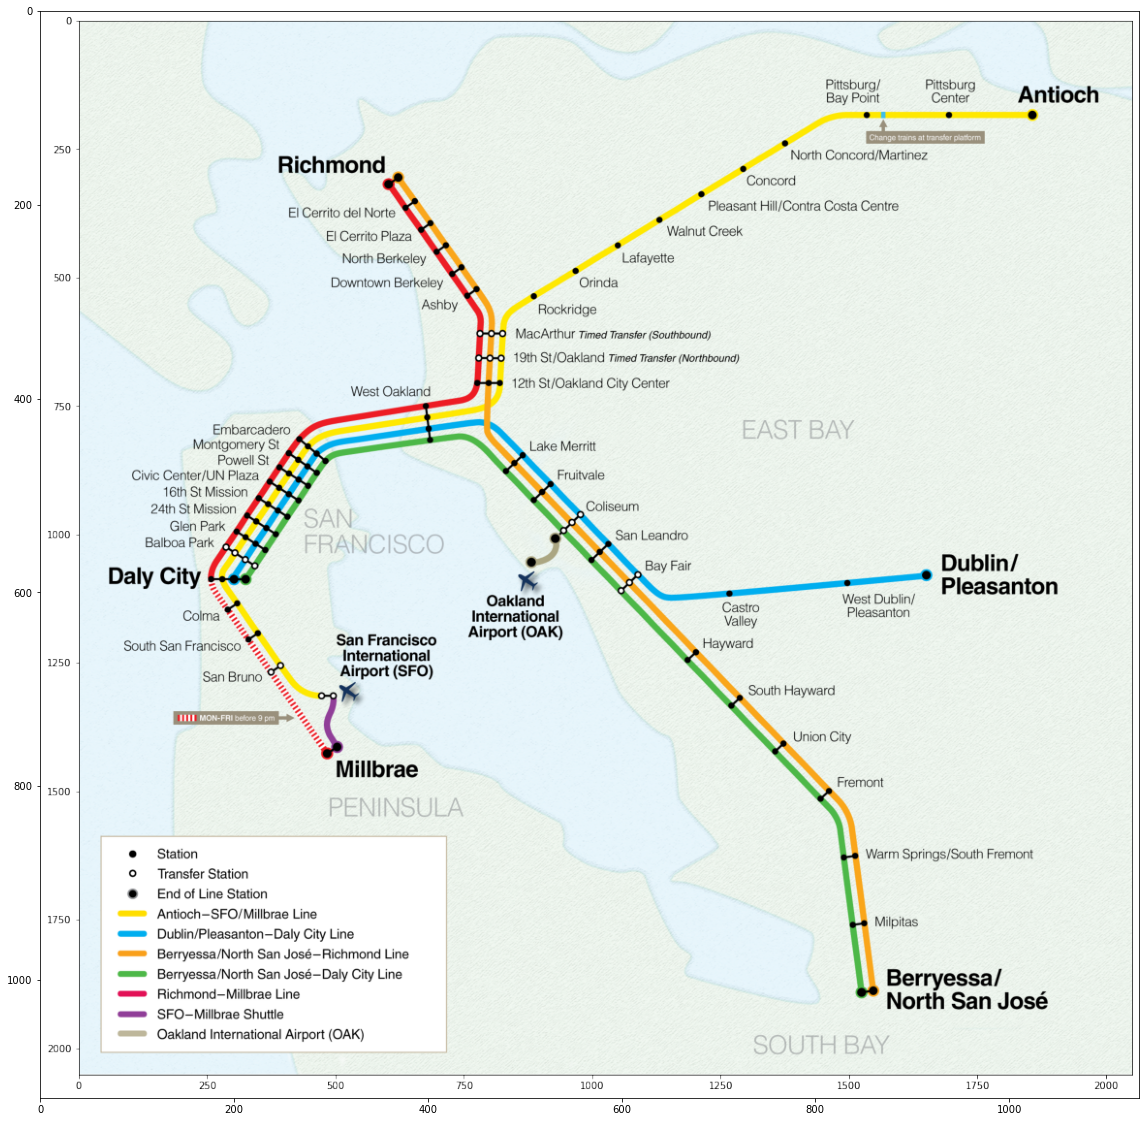

In [3]:
plt.figure(figsize=(20,20))
img = plt.imread('BART System Map API.png')
plt.imshow(img)
plt.show()

In [4]:
df1 = pd.read_csv('station_names.csv')
del df1["Unnamed: 0"]
df1

,station_name_sort,Station Name
0,RM,Richmond
1,EN,El Cerrito Del Norte
2,EP,El Cerrito Plaza
3,NB,North Berkeley
4,BK,Berkeley
5,AS,Ashby
6,MA,MacArthur
7,19,19th Street Oakland
8,12,12th Street / Oakland City Center
9,LM,Lake Merritt


In [5]:
df2 = pd.read_csv("station_coords.csv")
del df2["Unnamed: 0"]
df2

,station_name,latitute,longitude
0,12TH,798,702
1,19TH,798,655
2,MCAR,802,607
3,16TH,375,948
4,CIVC,397,915
5,POWL,419,886
6,MONT,438,860
7,EMBR,457,834
8,24TH,358,988
9,GLEN,339,1023


In [6]:
df3 = pd.read_csv("date-hour-soo-dest-2017.csv")
df3

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2017-01-01,0,12TH,19TH,1
1,2017-01-01,0,12TH,24TH,2
2,2017-01-01,0,12TH,BAYF,1
3,2017-01-01,0,12TH,CIVC,5
4,2017-01-01,0,12TH,COLS,2
...,...,...,...,...,...
9974090,2018-01-01,2,WOAK,POWL,3
9974091,2018-01-01,2,WOAK,RICH,1
9974092,2018-01-01,2,WOAK,SBRN,1
9974093,2018-01-01,2,WOAK,SHAY,2


In [7]:
df4 = pd.read_csv("date-hour-soo-dest-2016.csv")
df4

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2
...,...,...,...,...,...
9973657,2017-01-01,2,WOAK,MONT,2
9973658,2017-01-01,2,WOAK,PLZA,2
9973659,2017-01-01,2,WOAK,POWL,5
9973660,2017-01-01,2,WOAK,SBRN,1


In [8]:
df = df3.append(df4)
df

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2017-01-01,0,12TH,19TH,1
1,2017-01-01,0,12TH,24TH,2
2,2017-01-01,0,12TH,BAYF,1
3,2017-01-01,0,12TH,CIVC,5
4,2017-01-01,0,12TH,COLS,2
...,...,...,...,...,...
9973657,2017-01-01,2,WOAK,MONT,2
9973658,2017-01-01,2,WOAK,PLZA,2
9973659,2017-01-01,2,WOAK,POWL,5
9973660,2017-01-01,2,WOAK,SBRN,1


In [9]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Weekday'] = pd.DatetimeIndex(df['Date']).weekofyear
df['DayID'] = pd.DatetimeIndex(df['Date']).weekday
del df["Date"]
df

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Day,Weekday,DayID
0,0,12TH,19TH,1,2017,1,1,52,6
1,0,12TH,24TH,2,2017,1,1,52,6
2,0,12TH,BAYF,1,2017,1,1,52,6
3,0,12TH,CIVC,5,2017,1,1,52,6
4,0,12TH,COLS,2,2017,1,1,52,6
...,...,...,...,...,...,...,...,...,...
9973657,2,WOAK,MONT,2,2017,1,1,52,6
9973658,2,WOAK,PLZA,2,2017,1,1,52,6
9973659,2,WOAK,POWL,5,2017,1,1,52,6
9973660,2,WOAK,SBRN,1,2017,1,1,52,6


In [10]:
df.sample(10)

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Day,Weekday,DayID
2731523,5,DALY,MLBR,1,2017,4,13,15,3
9676021,6,PLZA,PHIL,3,2017,12,20,51,2
4597337,19,PLZA,19TH,8,2016,6,16,24,3
2409573,22,PITT,DBRK,1,2017,3,31,13,4
1512569,10,ORIN,NCON,1,2017,2,27,9,0
229673,21,CIVC,12TH,36,2016,1,9,1,5
1247083,6,COLM,POWL,39,2017,2,17,7,4
1227730,12,GLEN,ROCK,2,2017,2,16,7,3
9288651,8,SHAY,HAYW,17,2017,12,6,49,2
8606961,22,MONT,HAYW,8,2017,11,10,45,4


In [11]:
df5 = pd.DataFrame()

In [12]:
df['StationBusiest']=df['Origin Station'] + df['Destination Station']

In [13]:
df5['Total Trip'] = df.groupby('StationBusiest')['Trip Count'].sum().sort_values(ascending=False)

In [14]:
df5['Total Trip']

StationBusiest
POWLBALB    1609859
BALBMONT    1491013
BALBPOWL    1370588
DUBLEMBR    1351861
POWL24TH    1336889
             ...   
COLMWARM        463
WARMSBRN        366
WARMCOLM        319
MLBRWARM        302
WARMMLBR        268
Name: Total Trip, Length: 2116, dtype: int64

## Which BART station is the busiest?

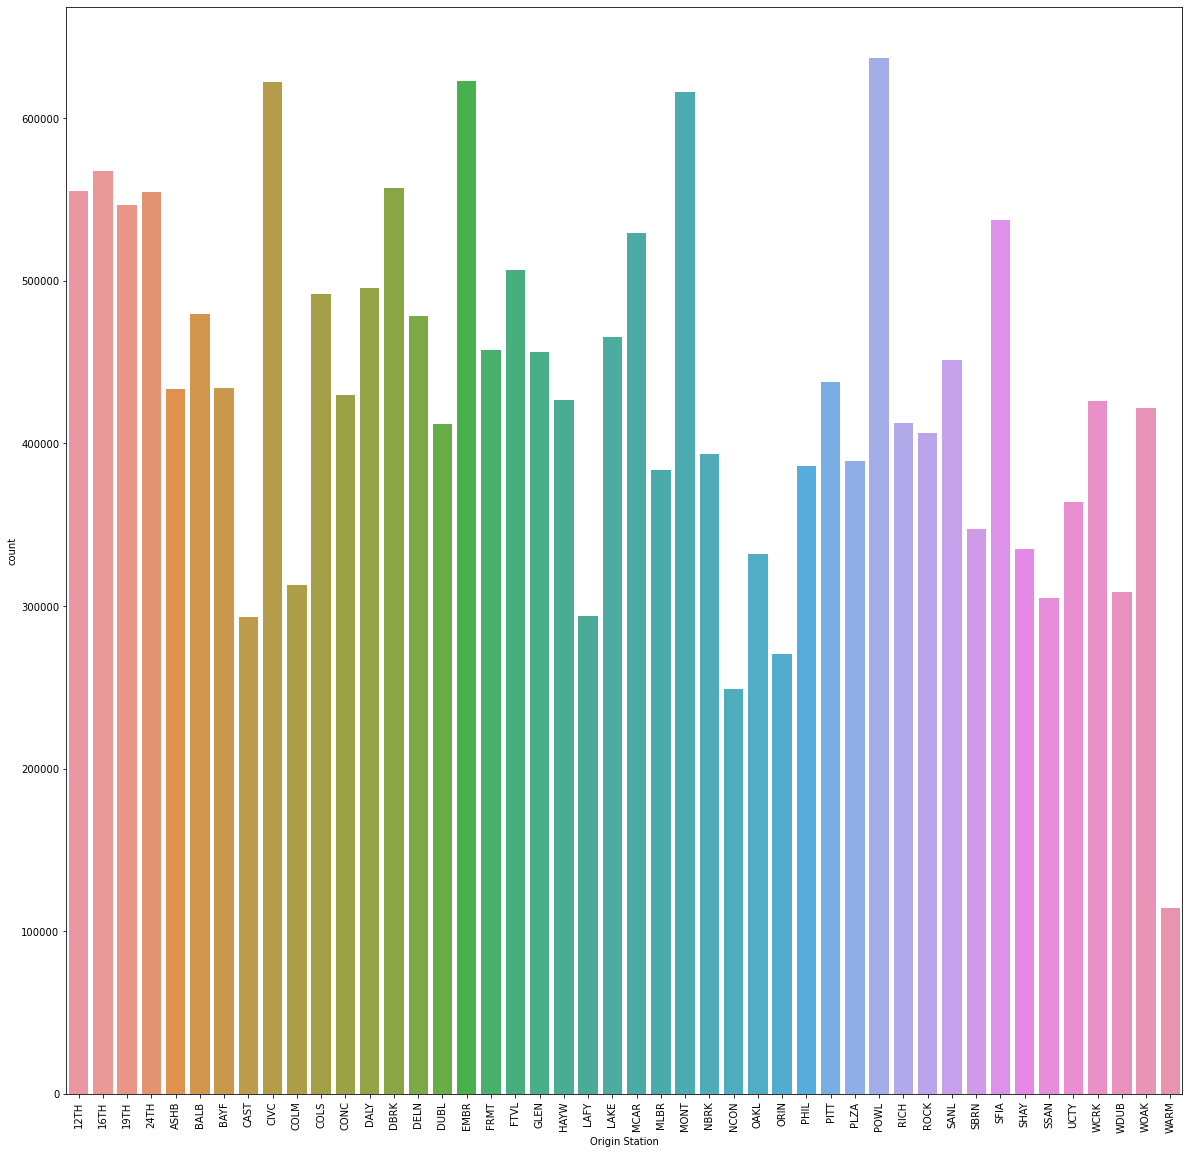

In [15]:
fig=plt.figure(figsize=(20,20))
ax=sns.countplot(df['Origin Station'],)
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);

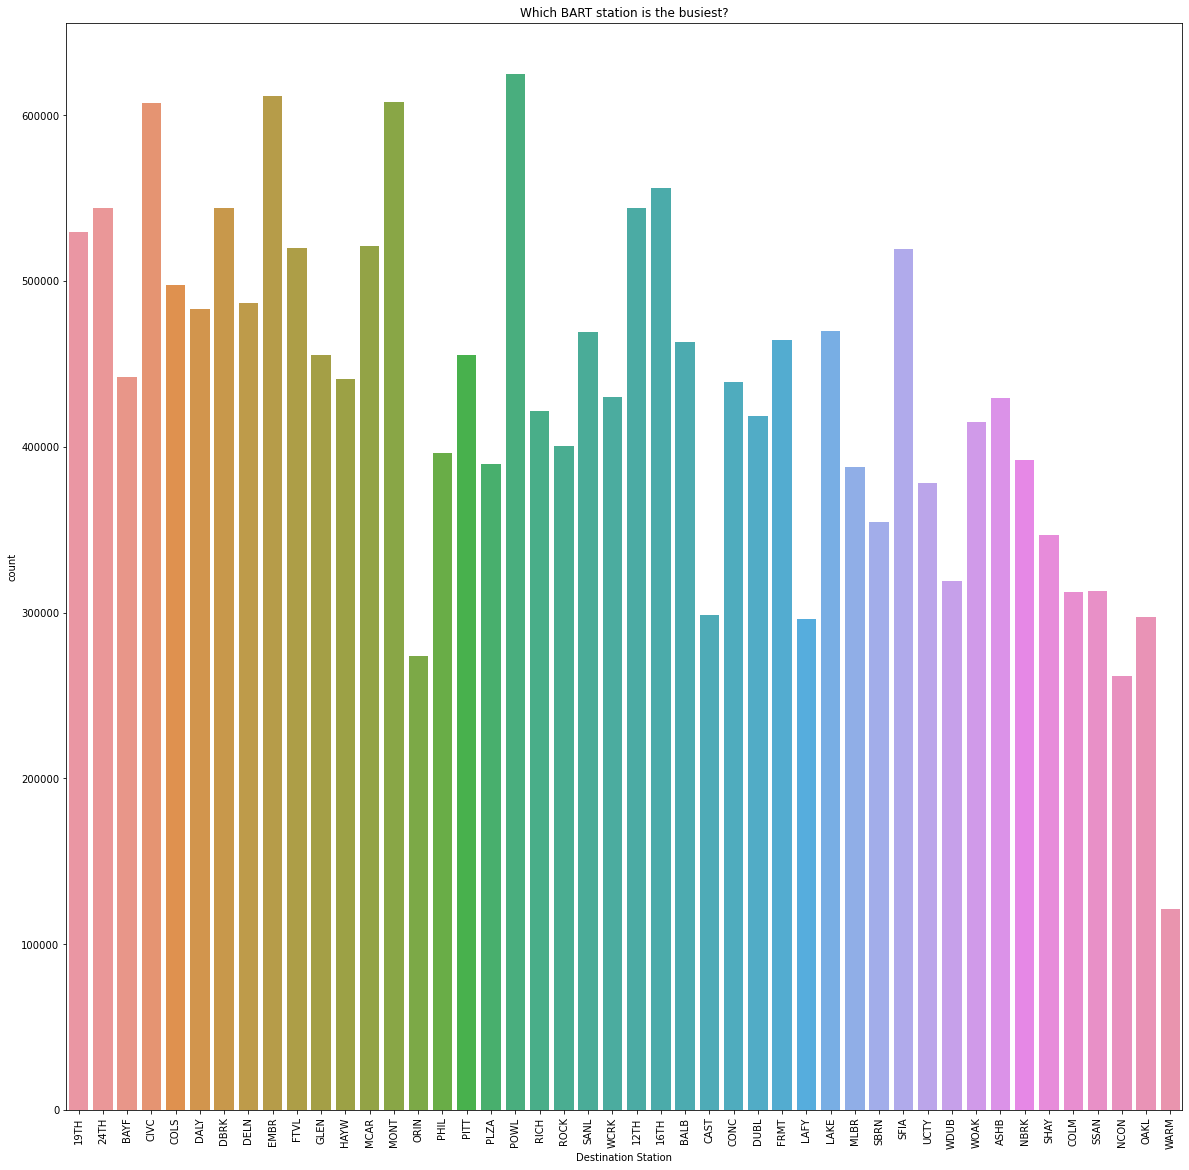

In [16]:
fig=plt.figure(figsize=(20,20))
ax=sns.countplot(df['Destination Station'],)
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel('Destination Station')
plt.xticks(rotation=90);

## What is the least popular BART route?

### <span style="font-size:larger;"><span style="color:green">WARMMLBR :Warm Springs to Millbrae</span></span> 

In [17]:
df5['Total Trip']

StationBusiest
POWLBALB    1609859
BALBMONT    1491013
BALBPOWL    1370588
DUBLEMBR    1351861
POWL24TH    1336889
             ...   
COLMWARM        463
WARMSBRN        366
WARMCOLM        319
MLBRWARM        302
WARMMLBR        268
Name: Total Trip, Length: 2116, dtype: int64

## When is the best time to go to SF from Berkeley if you want to find a seat?

Sunday 03.00 AM is the best time to go to SF from Berkeley

In [18]:
sf=df[(df['Origin Station']=='DBRK') & (df['Destination Station']=='SSAN')]

In [19]:
sf.groupby('Hour').count()['Trip Count'].sort_values(ascending=False)

Hour
17    652
18    643
16    615
19    566
9     523
22    518
8     505
15    493
20    468
21    454
7     400
14    399
13    389
23    348
10    344
11    327
12    310
0     240
6     190
5     148
1      72
2       2
3       1
Name: Trip Count, dtype: int64

In [20]:
sf.groupby('Weekday').count()['Trip Count'].sort_values(ascending=False)

Weekday
34    189
19    188
25    185
26    185
5     183
43    182
16    182
15    180
6     179
29    179
10    179
40    177
42    175
38    175
17    175
18    174
41    173
33    173
39    173
30    172
8     172
28    172
21    171
45    170
46    169
14    169
9     168
11    168
37    168
13    167
7     167
20    167
23    166
35    165
44    164
31    163
4     163
24    163
50    162
12    161
49    159
36    159
48    158
3     156
32    153
27    151
22    146
47    136
51    129
1     123
2     121
52     94
53      9
Name: Trip Count, dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='count'>

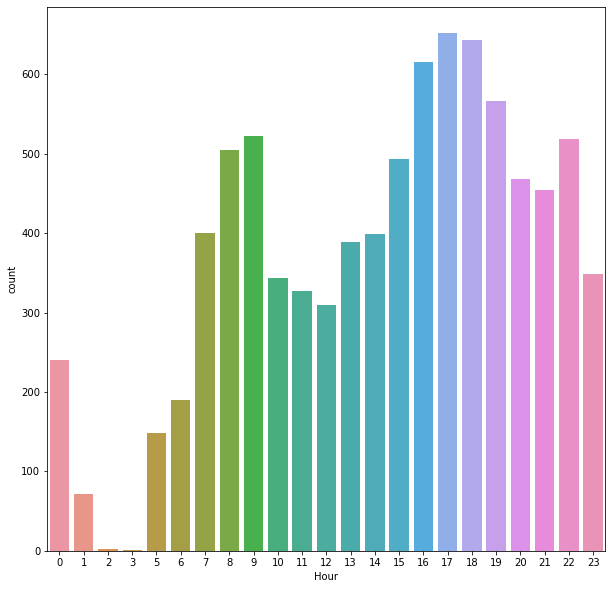

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(sf['Hour'])

<AxesSubplot:xlabel='Weekday', ylabel='count'>

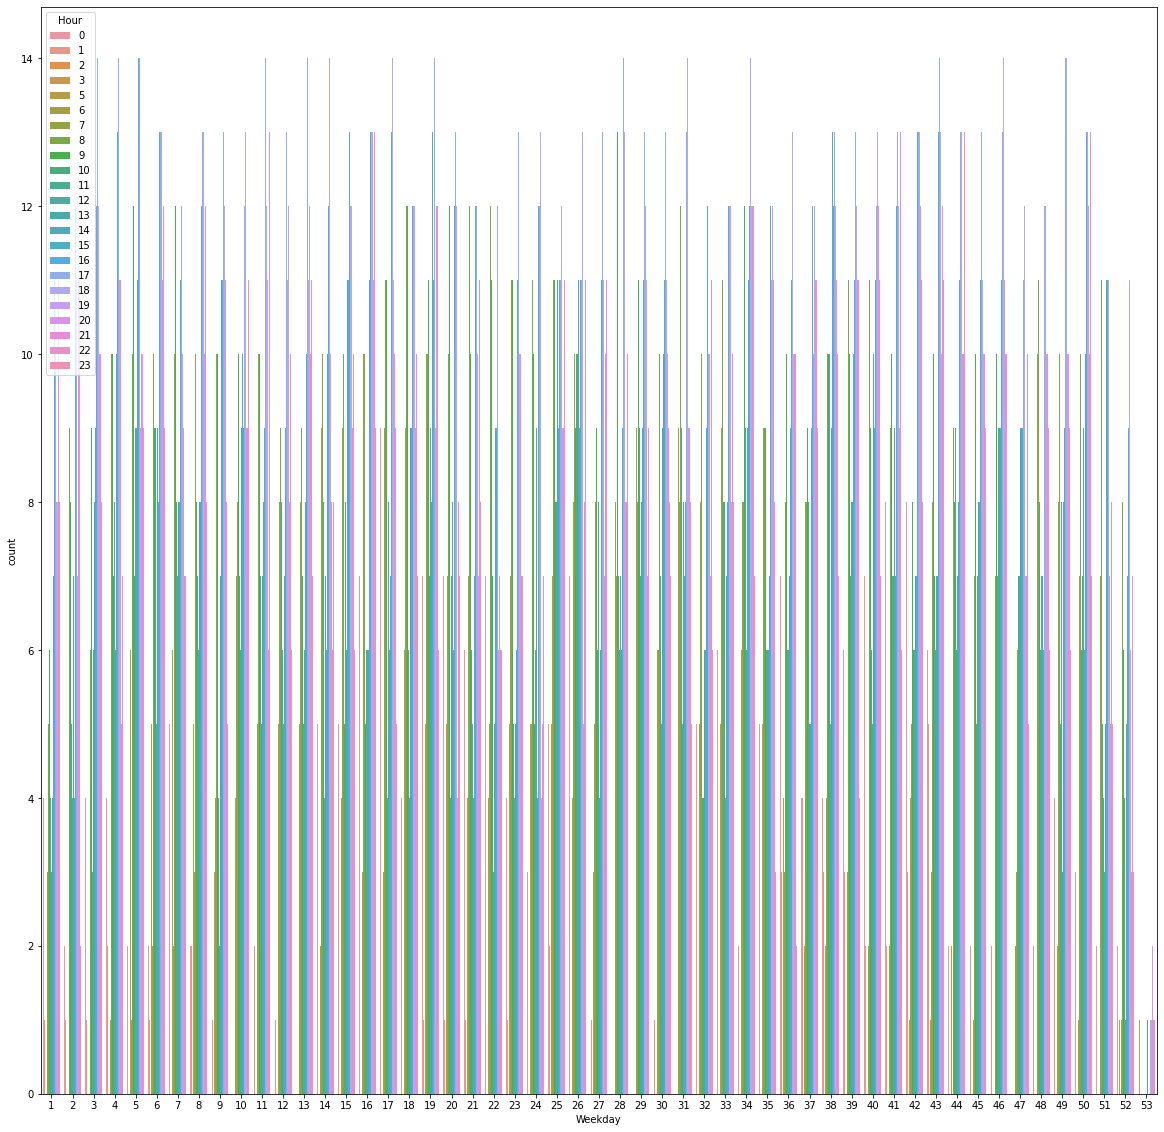

In [22]:
plt.figure(figsize=(20,20))
sns.countplot(sf['Weekday'],hue=sf['Hour'])

## Which day of the week is the busiest?

The answer is <span style="font-size:larger;"><span style="color:green">FRIDAY</span></span> which is the 4th day of the week

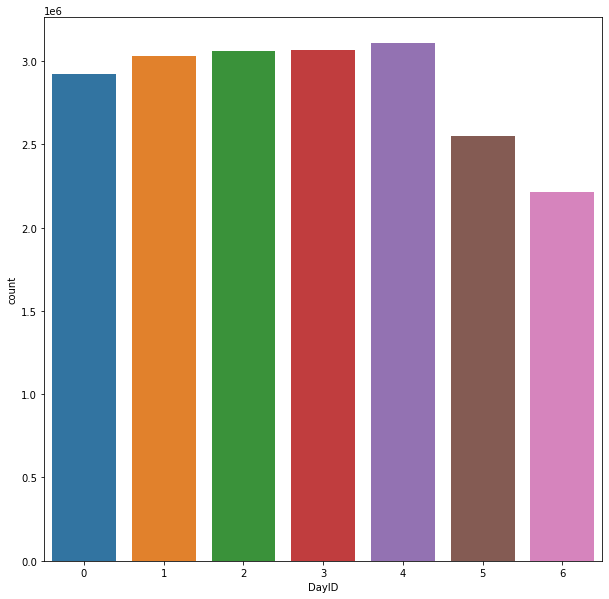

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(df['DayID']);

## How many people take the BART late at night?

#### <span style="font-size:larger;"><span style="color:green">3582552</span></span>

In [24]:
df[(df['Hour']>0) & (df['Hour']<6)]['Trip Count'].sum()

3582552

## Question A: Compute the straight line distance between every station

In [25]:
stationsA=df2[["station_name","latitute","longitude"]]
stationsB=df2[["station_name","latitute","longitude"]]

In [26]:
stationsA[["longitude","latitude"]]=stationsA[["longitude","latitute"]].astype("float")
stationsB[["longitude","latitude"]]=stationsB[["longitude","latitute"]].astype("float")

In [27]:
stationsA[['lat_radians_A','long_radians_A']] = np.radians(stationsA[['latitute','longitude']])
stationsB[['lat_radians_B','long_radians_B']] = np.radians(stationsB[['latitute','longitude']])

In [28]:
import sklearn
from sklearn import neighbors

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

dist_matrix = (dist.pairwise
    (stationsA[['lat_radians_A','long_radians_A']],stationsB[['lat_radians_B','long_radians_B']])*6371)

# Note that 6371 is the radius of the earth in kilometers

df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=stationsA['station_name'], 
                 columns=stationsB['station_name'])
)

In [29]:
df_dist_matrix

station_name,12TH,19TH,MCAR,16TH,CIVC,POWL,MONT,EMBR,24TH,GLEN,...,CAST,WDUB,DUBL,OAKL,ASHB,DBRK,NBRK,PLZA,DELN,RICH
station_name,,,,,,,,,,,,,,,,,,,,,
12TH,0.000000,1057.584186,1663.472619,8909.621742,7038.016162,4778.944596,2618.937892,995.741980,9860.127863,11288.385173,...,11155.957608,2007.513335,15108.539289,9561.014410,6299.982047,9502.164627,11941.896665,14561.366701,17145.809090,18813.276291
19TH,1057.584186,0.000000,988.388694,7853.930801,6222.015617,4397.981758,2604.512517,556.256659,9041.822315,11020.484362,...,10099.364087,3064.862879,14262.358698,9105.276044,5725.558167,9617.961499,12765.303827,15591.577920,17527.017874,19124.229234
MCAR,1663.472619,988.388694,0.000000,7500.666094,5377.898240,3411.359073,1804.217720,671.289604,9399.526513,11830.365496,...,9738.349267,3488.740903,13450.385679,8122.545384,4757.701582,8728.025766,12380.238332,16060.129375,18498.869833,18137.509047
16TH,8909.621742,7853.930801,7500.666094,0.000000,4070.661742,6995.140922,8330.694084,8034.467182,4789.736736,9108.528448,...,2248.334567,10910.124618,7174.099956,6723.996970,5804.863217,10202.138170,15499.036586,16455.643072,12594.587316,11871.977078
CIVC,7038.016162,6222.015617,5377.898240,4070.661742,0.000000,3211.595762,5209.542583,6049.156203,8644.261551,12953.308665,...,5611.405294,8639.787371,8072.502140,3761.319771,1747.244659,6627.616593,12259.494088,17171.622255,15572.994901,13046.697363
POWL,4778.944596,4397.981758,3411.359073,6995.140922,3211.595762,0.000000,2315.445231,3969.100529,10882.686156,14590.029670,...,8792.583940,5846.250524,10599.252254,4782.086203,1724.137912,5630.111294,10559.130518,15885.536470,18083.951955,14726.603225
MONT,2618.937892,2604.512517,1804.217720,8330.694084,5209.542583,2315.445231,0.000000,2061.933911,11044.614919,13612.756136,...,10435.993892,3542.331535,12914.520466,7028.454891,4002.477343,7019.247480,10690.304653,15154.261603,19103.666296,16580.785987
EMBR,995.741980,556.256659,671.289604,8034.467182,6049.156203,3969.100529,2061.933911,0.000000,9530.359554,11573.471456,...,10281.569562,2893.110991,14121.654967,8725.609148,5392.157699,9080.901564,12273.015743,15491.832435,17976.093504,18634.440654
24TH,9860.127863,9041.822315,9399.526513,4789.736736,8644.261551,10882.686156,11044.614919,9530.359554,0.000000,4340.251902,...,4783.111256,11442.790428,9242.548334,11458.136530,10243.393504,14978.347170,18222.364927,13261.835489,9737.965574,11347.660988


In [30]:
df_dist_long = (
    pd.melt(df_dist_matrix.reset_index(),id_vars='station_name')
)
df_dist_long = df_dist_long.rename(columns={'value':'km'})

In [31]:
df_dist_long

,station_name,station_name,km
0,12TH,12TH,0.000000
1,12TH,12TH,1057.584186
2,12TH,12TH,1663.472619
3,12TH,12TH,8909.621742
4,12TH,12TH,7038.016162
...,...,...,...
2495,RICH,RICH,9563.987153
2496,RICH,RICH,6884.979341
2497,RICH,RICH,4899.651141
2498,RICH,RICH,3377.728342


## Question B: Build a model that can predicted the number of people commuting to work by Bart between any 2 stations:

In [32]:
morning=df[(df['Hour']==8)]
evening=df[(df['Hour']==17)]

In [33]:
morning.groupby(['Year','Month','Weekday'])['Trip Count'].mean()

Year  Month  Weekday
2016  1      1          24.034725
             2          25.278073
             3          21.654530
             4          25.955802
             53          4.406078
                          ...    
2017  12     48         15.471913
             49         23.986396
             50         24.030412
             51         20.898230
             52         10.706314
Name: Trip Count, Length: 125, dtype: float64

In [34]:
evening.groupby(['Year','Month','Weekday'])['Trip Count'].mean()

Year  Month  Weekday
2016  1      1          22.700558
             2          23.323679
             3          21.514454
             4          24.807479
             53          7.406114
                          ...    
2017  12     48         16.903252
             49         22.826083
             50         22.750226
             51         20.418705
             52         12.814939
Name: Trip Count, Length: 125, dtype: float64

In [35]:
count1=(evening.groupby(['Year','Month','Weekday'])['Trip Count'].mean()+morning.groupby(['Year','Month','Weekday'])['Trip Count'].mean())/2

In [36]:
count1=count1.dropna()

In [37]:
count1

Year  Month  Weekday
2016  1      1          23.367642
             2          24.300876
             3          21.584492
             4          25.381640
             53          5.906096
                          ...    
2017  12     48         16.187583
             49         23.406240
             50         23.390319
             51         20.658467
             52         11.760626
Name: Trip Count, Length: 125, dtype: float64